# Random Forest Classifier
[link](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
jobData = pd.read_csv("Datasets/cleaned_data.csv")

In [3]:
y = pd.DataFrame(jobData['fraudulent'])

to_drop = ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country_code', 'fraudulent', 'lemmatized_documents']
X = jobData.copy()
X.drop(to_drop, axis = 1, inplace = True)

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [15]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=255)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Train data Accuracy: 0.9967241930329178
Test data Accuracy: 0.9876957494407159
Train Data F1 score:	 0.9672785315243416
Test Data F1 score:	 0.8625


<AxesSubplot:>

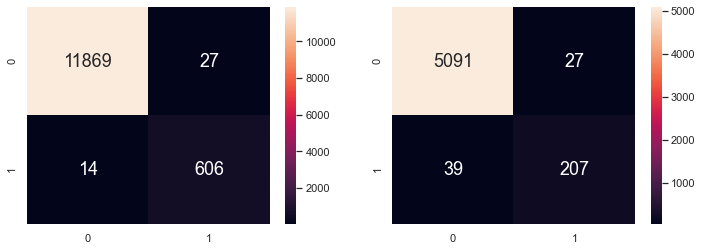

In [16]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score

# Model Accuracy, how often is the classifier correct?
print("Train data Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test data Accuracy:", accuracy_score(y_test, y_test_pred))

print("Train Data F1 score:\t", f1_score(y_train, y_train_pred))
print("Test Data F1 score:\t", f1_score(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [17]:
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp.head(10)

NLP_Pred                                0.493473
has_company_logo                        0.051274
salary_upper_limit                      0.022742
industry_Oil & Energy                   0.022406
salary_lower_limit                      0.020200
country_code_is_US                      0.019075
has_questions                           0.018051
function_type_is_Administrative         0.013141
employment_type_is_Full-time            0.011115
required_experience_is_Not specified    0.010808
dtype: float64